# Introduction to Jupyter and PySpark

This notebook will provide an introduction to notebooks and in particular to working with PySpark in notebooks. Jupyter is an open source project and has a website (https://jupyter.org/) with links to lots of documentation. Datalabs which is available on Google Cloud Platform is a branded branch of Jupyter with only a few differences from standard Jupyter.



A notebook allows documentation, executable code and visualization to be intermixed. This cell is a documentation cell, which accepts Markdown formattet text and displays it nicely. The cell below is a code cell. It can be executed by selecting it and pressing the run button at the top or by using the keyboard short-cut **shift + enter**.

In [1]:
print("Hello world")

Hello world


## Lists, Tuples and Dictionaries

## Functions, conditionals and loops

Python has a very simple syntax and is generally easy to pick up for programmers of other languages. In Python, indentation is used in stead of the curly brackets {} that are used in C and Java for example.

##### Conditionals

Conditionals look as follows:

In [2]:
x = 4

if x < 5:
    print("x is smaller than 5")
    
if x > 5:
    print("x is greater than 5")

x is smaller than 5


##### Loops

**for**-loops in Python can iterate over list like objects:

In [3]:
a = [1,2,4,"five"]

for x in a:
    print(x)

1
2
4
five


The build in function **range()** generates a list, which can be useful for looping:

In [4]:
for i in range(0,5):
    print(i)

0
1
2
3
4


##### Functions

A function in Python is defined with the def key word:

In [5]:
def addition(a, b):
    return a + b

addition(2, 3)

5

Functions in Python are objects and can be passed as arguments to other functions:

In [6]:
def shout(text): 
    return text.upper() 
  
def whisper(text): 
    return text.lower() 
  
def greet(func): 
    greeting = func("Hello Python") 
    print(greeting)
    

greet(whisper)
greet(shout)

hello python
HELLO PYTHON


Another feature of Python, which comes in especially handy when working with big data is the option of defining anonymous functions with the **lambda** keyword: 

In [7]:
greet(lambda x: "Plain: " + x + "\nWhispering: " + whisper(x) + "\nShouting: "+shout(x))

Plain: Hello Python
Whispering: hello python
Shouting: HELLO PYTHON


## Accessing Spark

When we run Jupyter with the "PySpark"-kernel we can access the Spark system via the predifined object **spark**:

In [8]:
spark

In [31]:
data = spark.sparkContext.parallelize(range(10))
data.collect()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
data.map(lambda x: x*2).collect()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## Visualizing data

One of the big advantages of working in notebooks is that visualization is possible to intermix visualization with code and documentation.

There are several visualization libraries availiable for Python. Here we will use the library called Seaborn ( https://seaborn.pydata.org/ ), which depends on the library called Pandas ( https://pandas.pydata.org/ ). Pandas allows data to be represented as a table-like structure called DataFrames.

Below is an example of simple bar chart using Pandas and Seaborn:

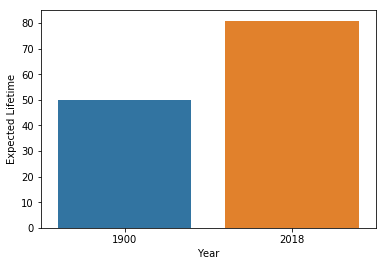

In [23]:
import seaborn as sns
import pandas as pd
%matplotlib inline

lifetime_data=pd.DataFrame([["1900", 50.1], ["2018", 80.9]], columns=["Year", "Expected Lifetime"])
sns.barplot(x="Year", y="Expected Lifetime", data=lifetime_data)

Here are a few example of more detailed bar charts:

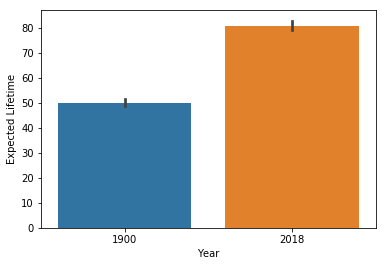

In [28]:
lifetime_data=pd.DataFrame([["1900", "Men", 48.6], ["1900", "Women", 51.4], 
                   ["2018", "Men", 79.0], ["2018", "Women", 82.9]], 
                  columns=["Year", "Sex", "Expected Lifetime"])
sns.barplot(x="Year", y="Expected Lifetime", data=lifetime_data)

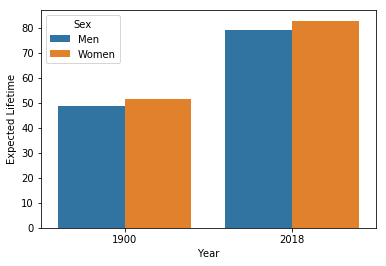

In [29]:
sns.barplot(x="Year", y="Expected Lifetime", hue="Sex", data=lifetime_data)

Another type of useful plot is a heatmap, which is also supported by Seaborn:

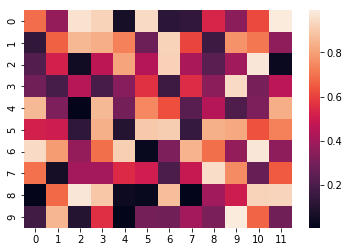

In [11]:
import random

data=[]
for i in range(10):
    row=[]
    for j in range(12):
        row.append(random.random())
    data.append(row)
    
ax = sns.heatmap(data)

Remember: if we want to visualize data in Spark, we will need to collect it first.